# Project Overview  

This project consists of four CNN models for fashion image classification:  

1. **Primary Category Model** – Classifies images into three main categories:  
   - Glasses/Sunglasses  
   - Trousers/Jeans  
   - Shoes  

2. **Eyewear Model** – Distinguishes between:  
   - Glasses  
   - Sunglasses  

3. **Trousers Model** – Classifies trousers and jeans by gender:  
   - Trousers Male   
   - Jeans Male
   - Trousers Female  
   - Jeans Female 

4. **Footwear Model** – Classifies different types of shoes:  
   - Boots 
   - Trainers/Sneakers 
   - Sandals/Slippers  
   - Formal Shoes   
   - Others   

Each model is trained separately on its respective subset of the dataset to improve classification accuracy.


# Import Relevant Libraries  
Importing all the necessary libraries used for data processing, model building, and evaluation in this CNN project.


In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import itertools 
import datetime

# Load the Dataset  
Loading the preprocessed dataset from `.npz` files and splitting it into training and testing sets.

In [5]:
data_train = np.load("Dataset/glasses/Glasses & Sunglasses - Train.npz")
data_test = np.load("Dataset/glasses/Glasses & Sunglasses - Test.npz")


In [6]:
print(f" Train shpe: {np.shape(data_train["images"])}")
print(f" Test shpe: {np.shape(data_test["images"])}")


 Train shpe: (4002, 120, 90, 3)
 Test shpe: (500, 120, 90, 3)


# Extract Images and Labels  
Extracting image data and corresponding labels from the training, validation, and testing datasets.


In [8]:
images_train = data_train["images"]
labels_train = data_train["labels"]


images_test = data_test["images"]
labels_test = data_test["labels"]

# Normalize Image Data  
Normalizing pixel values to the range [0, 1] to improve model training stability and performance.


In [10]:
images_train = images_train / 255.0
images_test = images_test / 255.0


# Split Training Data  

splitting the training dataset into training and validation sets.  
- **10%** of the training data is used for validation.  

In [12]:
images_train , images_val , labels_train , labels_val = train_test_split(images_train ,
                                                                         labels_train ,
                                                                         test_size = 0.1 ,
                                                                         stratify = labels_train ,
                                                                         random_state = 42)

# Build and Compile the Eyewear Model  

Defining a CNN model to classify images into two categories: Glasses and Sunglasses.  
- The architecture includes two convolutional and max-pooling layers followed by a flattening layer and a dense output layer.  
- The model is compiled using the **Adam** optimizer and **SparseCategoricalCrossentropy** loss, with **accuracy** as the evaluation metric.


In [14]:
num_epochs = 15 
batch_size = 64 

model_glasses = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32 , 5, input_shape = (120,90,3)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Conv2D(32 , 3),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Flatten(),
        
    tf.keras.layers.Dense(2)
        
])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)
model_glasses.compile(optimizer = "adam" , loss = loss_fn , metrics = ["accuracy"])

C:\Users\rasol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define Callbacks and TensorBoard 

Setting up training callbacks for the Eyewear CNN model

In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

log_dir = "logs//fit//glasses//" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq = 1)

# Train the Model  

Training the CNN model to classify Glasses and Sunglasses.  

In [18]:
model_glasses.fit(images_train,
          labels_train,
          validation_data = (images_val , labels_val),
          epochs=num_epochs,
          batch_size = batch_size ,
          callbacks = [tensorboard_callback , early_stopping],
          shuffle = True
         )    

Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.6679 - loss: 1.0062 - val_accuracy: 0.9127 - val_loss: 0.2142
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9316 - loss: 0.1859 - val_accuracy: 0.9501 - val_loss: 0.2162
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9468 - loss: 0.1557 - val_accuracy: 0.9426 - val_loss: 0.1659
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9576 - loss: 0.1390 - val_accuracy: 0.9676 - val_loss: 0.1892
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9542 - loss: 0.1425 - val_accuracy: 0.9726 - val_loss: 0.1651
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9580 - loss: 0.1316 - val_accuracy: 0.9127 - val_loss: 0.2321
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9510 - loss: 0.1374 - val_accuracy: 0.9576 - val_loss: 0.1689


# Evaluate the Model  
Evaluating the trained CNN model on the test dataset to measure its final performance.  
The overall test accuracy is printed to summarize the model’s generalization capability.

In [20]:
_, model_glasses_accuracy = model_glasses.evaluate(images_test , labels_test)
print(f"The model accuracy on test data is {model_glasses_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9420 - loss: 0.1599
The model accuracy on test data is 0.9539999961853027


# Make Predictions  
Generating predictions on the test dataset.  

In [22]:
predictions = model_glasses.predict(images_test)
probabilities = tf.nn.softmax(predictions).numpy()*100
predictions_class = np.argmax(predictions , axis = 1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# Confusion Matrix and Classification Report  

Computing and visualizing the confusion matrix to evaluate the model’s performance across all classes.  
- The `plot_confusion_matrix` function displays the confusion matrix with optional normalization.  
- `classification_report` from scikit-learn provides precision, recall, and F1-score for each class.  
  1. Glasses
  2. Sun glasses


In [24]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.97      0.95      0.96       296

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Confusion matrix, without normalization
[[195   9]
 [ 14 282]]


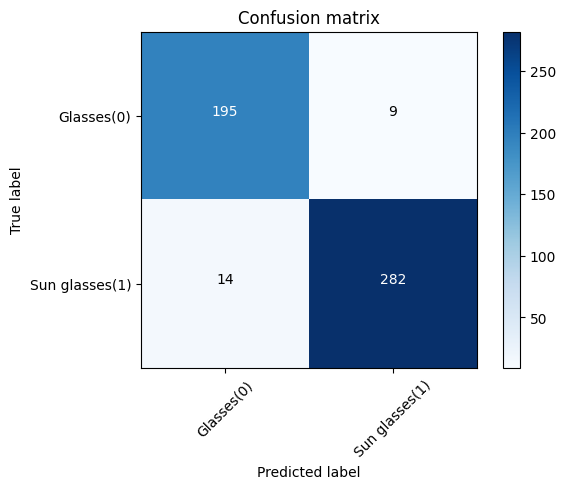

In [25]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(labels_test, predictions_class, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(labels_test, predictions_class))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Glasses(0)','Sun glasses(1)'],normalize= False,  title='Confusion matrix')

# Launch TensorBoard  

Loading TensorBoard within the notebook to visualize training metrics such as loss and accuracy over epochs.  

In [27]:
%reload_ext tensorboard
%tensorboard --logdir "logs/fit/glasses"